In [1]:
import os
import tensorflow as ts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

라이브러리 import

In [ ]:
d = glob.glob('./유동인구데이터/성연령유동/*')
a = glob.glob('./유동인구데이터/시간대유동/*')
w = []
g = []

for f in d:
    temp = pd.read_csv(f, sep='|')
    w.append(temp)
    
for f in a:
    temp = pd.read_csv(f, sep='|')
    g.append(temp)
    
age_data = pd.concat(w)
time_data = pd.concat(g)

# read files
weather_allFiles1 = glob.glob('./환경기상데이터/노원구/*')
weather_allFiles2 = glob.glob('./환경기상데이터/종로구/*')
allFiles = weather_allFiles1 + weather_allFiles2
w = []

for f in allFiles:
    temp = pd.read_csv(f)
    w.append(temp)

weather = pd.concat(w)

weather.drop(['flag', 'co2', 'vocs', 'noise',
              'temp', 'humi', 'Unnamed: 10'], axis = 1, inplace=True)

# 이상치 제거
weather = weather[weather['pm10'] != -999]
weather['tm'] = weather['tm'] // 10000
weather.head()

# 계층적 인덱스를 사용하지 않아서 reset_index() 로 인덱스를 칼럼으로 변환
# groupby serial & tm and average
weather = weather.groupby(['tm', 'serial']).mean().reset_index()

# serial number 를 행정동코드로 바꾼다.
weather.replace('V10O1610252',11110615, inplace = True)
weather.replace('V10O1610546',11110615, inplace = True)
weather.replace('V10O1610540',11110615, inplace = True)
weather.replace('V10O1610542',11110615, inplace = True)
weather.replace('V10O1610543',11110615, inplace = True)
weather.replace('V10O1610544',11110615, inplace = True)
weather.replace('V10O1610545',11110615, inplace = True)
weather.replace('V10O1610567',11110615, inplace = True)
weather.replace('V01o1610468',11110530, inplace = True)
weather.replace('V10O1611289',999, inplace = True)
weather.replace('V10O1611172',11110530, inplace = True)
weather.replace('V10O1611634',11110600, inplace = True)
weather.replace('V10O1611887',999, inplace = True)
weather.replace('V10O1611639',11110630, inplace = True)
weather.replace('V10O1611658',11110640, inplace = True)
weather.replace('V10O1612113',11110615, inplace = True)
weather.replace('V10O1611151',11110670, inplace = True)
weather.replace('V10O1611145',11110615, inplace = True)
weather.replace('V10O1611623',11110650, inplace = True)
weather.replace('V10O1611750',11110615, inplace = True)
weather.replace('V10O1611170',11110550, inplace = True)
weather.replace('V10O1611684',11110615, inplace = True)
weather.replace('V10O1611220',11110670, inplace = True)
weather.replace('V10O1612106',11110710, inplace = True)
weather.replace('V10O1611251',11110690, inplace = True)
weather.replace('V10O1611173',11110615, inplace = True)
weather.replace('V10O1611258',11110560, inplace = True)
weather.replace('V10O1611255',11110515, inplace = True)
weather.replace('V10O1611698',11110600, inplace = True)
weather.replace('V10O1611722',11110600, inplace = True)
weather.replace('V10O1611645',11110650, inplace = True)
weather.replace('V10O1610610',11350611, inplace = True)
weather.replace('V10O1610376',11350695, inplace = True)
weather.replace('V10O1610293',11350720, inplace = True)
weather.replace('V10O1610356',11350630, inplace = True)
weather.replace('V10O1610616',11350640, inplace = True)
weather.replace('V10O1610200',11350640, inplace = True)
weather.replace('V10O1610643',11350580, inplace = True)
weather.replace('V10O1610642',11350600, inplace = True)
weather.replace('V10O1610297',11350670, inplace = True)
weather.replace('V10O1610312',11350640, inplace = True)
weather.replace('V10O1610102',11350611, inplace = True)
weather.replace('V10O1610351',11350695, inplace = True)
weather.replace('V10O1610629',11350595, inplace = True)
weather.replace('V10O1610630',11350595, inplace = True)
weather.replace('V10O1611104',11350695, inplace = True)
weather.replace('V10O1611097',11350625, inplace = True)
weather.replace('V10O1611100',11350640, inplace = True)
weather.replace('V10O1612126',11350619, inplace = True)
weather.replace('V10O1611102',11350670, inplace = True)
weather.replace('V10O1611652',11350600, inplace = True)
weather.replace('V10O1611150',11350665, inplace = True)
weather.replace('V10O1611229',11350560, inplace = True)

# 유통:종합테이블과 컬럼명을 맞춰준다.
weather.rename(columns = {'serial':'ADMD_CD'}, inplace = True)
weather.drop(weather[weather['ADMD_CD']==999].index, axis=0, inplace = True)

weather.drop('ADMD_CD',axis=1)
weather_pm = weather.groupby('tm')['pm10','pm25'].mean()

기상데이터 통합 + pm컬럼만 남기고 제거

In [3]:
##주말 날짜 구분

weekend_data = time_data.groupby('STD_YMD')['TMST_00'].mean()
weekdata_index = list(weekend_data.index)

weekend_data_saturday = []
weekend_data_sunday = []

for i in range(53):  #토요일
    weekend_data_saturday.append(weekdata_index[0+(7*i)])
for i in range(52): #일요일
    weekend_data_sunday.append(weekdata_index[6+(7*i)])
weekend_date = [] #토요일+일요일
for i in weekend_data_saturday:
    weekend_date.append(i)
for i in weekend_data_sunday:
    weekend_date.append(i)
weekend_date.sort()

weekend_amount=[]
for i in weekend_date:
    weekend_amount.append(time_data[time_data['STD_YMD']==i].groupby('STD_YMD')['TMST_00'].mean())
    
weekend_amount= pd.concat(weekend_amount)
df = pd.DataFrame(list(weekend_amount.index), columns=['Day'])
df["Amount"] = list(weekend_amount)

holiday = [20180505, 20180507, 20180522, 20180606, 20180613, 20180815,
          20180923, 20180924, 20180925, 20180926, 20181003, 20181009, 20181225,
          20190101, 20190204, 20190205, 20190206, 20190301]
holiday_amount=[]
for i in holiday:
    holiday_amount.append(time_data[time_data['STD_YMD']==i].groupby('STD_YMD')['TMST_00'].mean())
holiday_amount= pd.concat(holiday_amount)
df_holi = pd.DataFrame(list(holiday_amount.index), columns=['Day'])
df_holi["Amount"] = list(holiday_amount)

weekend_date_copy = weekend_date
for i in holiday:
    weekend_date_copy.append(i)
total_holiday = list(set(weekend_date_copy))
total_holiday.sort()

weekday=list(time_data['STD_YMD'].unique())
for i in total_holiday:
    weekday.remove(i)

휴일, 평일 구분

In [4]:
pm_high_date=[]
pm_middle_date=[]
pm_low_date=[]
for i in time_data['STD_YMD'].unique():
    if weather_pm.loc[i]['pm10'] > 80 or weather_pm.loc[i]['pm25'] > 35:
        pm_high_date.append(i)
    elif weather_pm.loc[i]['pm10'] < 30 and weather_pm.loc[i]['pm25'] < 15:
        pm_low_date.append(i)
    else : pm_middle_date.append(i)

미세먼지 농도에 따라 high/middle/low를 구분

In [5]:
age_data.head()

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,...,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U
0,201804,20180401,1111051500,청운효자동,0.05,78.93,403.26,642.66,984.24,1792.30,...,1437.80,1356.08,1598.14,1495.53,1768.21,1611.47,1433.06,1212.56,549.45,811.56
1,201804,20180401,1111053000,사직동,1.25,262.54,1207.22,2177.88,4076.89,6887.72,...,6892.47,5743.10,5817.91,5429.89,6104.03,4998.93,4826.11,4207.45,2160.84,2972.08
2,201804,20180401,1111054000,삼청동,0.00,78.07,255.24,331.09,654.32,1264.86,...,1400.28,1183.11,1234.88,1157.69,1186.72,985.11,844.26,744.60,359.03,421.64
3,201804,20180401,1111055000,부암동,0.00,228.50,753.31,981.54,1615.77,2732.00,...,2153.73,2431.23,3028.24,2944.28,3532.23,3075.55,2785.22,2223.72,1118.48,1498.65
4,201804,20180401,1111056000,평창동,0.00,354.38,1500.63,1963.08,2593.07,4927.24,...,3775.91,4598.39,5661.53,5526.94,7075.02,6899.55,6886.22,5336.01,2629.75,3820.41


In [6]:
time_data.head()

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
0,201804,20180401,1111051500,청운효자동,609.11,447.82,301.75,217.03,237.07,318.75,...,3097.34,2550.96,2464.35,2327.44,1933.71,1597.47,1331.83,1231.07,1041.82,624.62
1,201804,20180401,1111053000,사직동,1904.32,1319.04,951.80,779.08,779.14,1355.75,...,10166.17,9179.66,8899.18,8318.59,7009.69,5750.79,5137.36,4532.06,3589.93,2308.88
2,201804,20180401,1111054000,삼청동,216.30,158.05,91.13,85.30,86.76,146.87,...,2361.17,2126.52,1998.35,1794.76,1281.02,1059.50,875.79,691.84,433.89,229.83
3,201804,20180401,1111055000,부암동,1300.61,904.38,670.74,433.02,571.34,771.25,...,5155.72,4888.78,5111.07,5067.47,4148.24,3502.62,3217.30,2925.42,2374.94,1382.12
4,201804,20180401,1111056000,평창동,2523.88,2168.69,1672.82,1300.87,1400.14,1686.09,...,10460.65,9539.91,8973.38,7940.15,6992.54,6460.50,5661.25,5210.50,4416.75,3060.66


In [7]:
age_data.drop(['STD_YM', 'HDONG_NM'], axis =1, inplace = True)
time_data.drop(['STD_YM', 'HDONG_NM'], axis = 1, inplace = True)

성연령데이터 drop

In [10]:
age_data['HDONG_CD'] = age_data['HDONG_CD'] // 100
time_data['HDONG_CD'] = time_data['HDONG_CD'] // 100

행정동 코드 변환(유통 코드 기준)

In [12]:
age_data['MAN_0009'] = age_data['MAN_FLOW_POP_CNT_0004'] + age_data['MAN_FLOW_POP_CNT_0509']
age_data['MAN_1019'] = age_data['MAN_FLOW_POP_CNT_1014'] + age_data['MAN_FLOW_POP_CNT_1519']
age_data['MAN_2029'] = age_data['MAN_FLOW_POP_CNT_2024'] + age_data['MAN_FLOW_POP_CNT_2529']
age_data['MAN_3039'] = age_data['MAN_FLOW_POP_CNT_3034'] + age_data['MAN_FLOW_POP_CNT_3539']
age_data['MAN_4049'] = age_data['MAN_FLOW_POP_CNT_4044'] + age_data['MAN_FLOW_POP_CNT_4549']
age_data['MAN_5059'] = age_data['MAN_FLOW_POP_CNT_5054'] + age_data['MAN_FLOW_POP_CNT_2529']
age_data['MAN_6069'] = age_data['MAN_FLOW_POP_CNT_6064'] + age_data['MAN_FLOW_POP_CNT_3539']
age_data['MAN_70'] = age_data['MAN_FLOW_POP_CNT_70U']

age_data['WMAN_0009'] = age_data['WMAN_FLOW_POP_CNT_0004'] + age_data['WMAN_FLOW_POP_CNT_0509']
age_data['WMAN_1019'] = age_data['WMAN_FLOW_POP_CNT_1014'] + age_data['WMAN_FLOW_POP_CNT_1519']
age_data['WMAN_2029'] = age_data['WMAN_FLOW_POP_CNT_2024'] + age_data['WMAN_FLOW_POP_CNT_2529']
age_data['WMAN_3039'] = age_data['WMAN_FLOW_POP_CNT_3034'] + age_data['WMAN_FLOW_POP_CNT_3539']
age_data['WMAN_4049'] = age_data['WMAN_FLOW_POP_CNT_4044'] + age_data['WMAN_FLOW_POP_CNT_4549']
age_data['WMAN_5059'] = age_data['WMAN_FLOW_POP_CNT_5054'] + age_data['WMAN_FLOW_POP_CNT_2529']
age_data['WMAN_6069'] = age_data['WMAN_FLOW_POP_CNT_6064'] + age_data['WMAN_FLOW_POP_CNT_3539']
age_data['WMAN_70'] = age_data['WMAN_FLOW_POP_CNT_70U']
                    

컬럼 통합 man/ woman 10, 20, 30, 40대...

In [13]:
age_data.drop(age_data.columns[2:32], axis = 1, inplace = True)

In [14]:
time_data['Day'] = time_data[time_data.columns[2:25]].sum(axis = 1)

일별 유동인구의 합을 구한다.

In [15]:
time_data.head()

,STD_YMD,HDONG_CD,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,TMST_07,...,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23,Day
0,20180401,11110515,609.11,447.82,301.75,217.03,237.07,318.75,519.28,1131.14,...,2550.96,2464.35,2327.44,1933.71,1597.47,1331.83,1231.07,1041.82,624.62,35840.95
1,20180401,11110530,1904.32,1319.04,951.80,779.08,779.14,1355.75,2473.61,3572.35,...,9179.66,8899.18,8318.59,7009.69,5750.79,5137.36,4532.06,3589.93,2308.88,128657.00
2,20180401,11110540,216.30,158.05,91.13,85.30,86.76,146.87,287.34,391.87,...,2126.52,1998.35,1794.76,1281.02,1059.50,875.79,691.84,433.89,229.83,25072.43
3,20180401,11110550,1300.61,904.38,670.74,433.02,571.34,771.25,1031.59,1810.52,...,4888.78,5111.07,5067.47,4148.24,3502.62,3217.30,2925.42,2374.94,1382.12,68349.64
4,20180401,11110560,2523.88,2168.69,1672.82,1300.87,1400.14,1686.09,2277.03,3703.51,...,9539.91,8973.38,7940.15,6992.54,6460.50,5661.25,5210.50,4416.75,3060.66,135390.16


In [16]:
age_data.head()

,STD_YMD,HDONG_CD,MAN_0009,MAN_1019,MAN_2029,MAN_3039,MAN_4049,MAN_5059,MAN_6069,MAN_70,WMAN_0009,WMAN_1019,WMAN_2029,WMAN_3039,WMAN_4049,WMAN_5059,WMAN_6069,WMAN_70
0,20180401,11110515,78.98,1045.92,2776.54,3996.64,4157.91,4141.25,3956.21,1165.64,142.94,1158.75,2476.23,2954.22,3263.74,3049.27,2810.70,811.56
1,20180401,11110530,263.79,3385.10,10964.61,13660.64,13327.45,13843.72,13787.50,4743.49,395.09,3946.88,12407.47,11561.01,11533.92,11891.40,10025.36,2972.08
2,20180401,11110540,78.07,586.33,1919.18,2820.54,2895.42,2667.85,2681.06,845.55,91.00,745.18,2363.92,2417.99,2344.41,2385.39,1979.48,421.64
3,20180401,11110550,228.50,1734.85,4347.77,7678.93,8770.41,7488.22,8167.98,2366.21,252.55,1995.96,3944.20,5459.47,6476.51,5229.28,5251.96,1498.65
4,20180401,11110560,354.38,3463.71,7520.31,12716.30,15683.12,14420.70,15828.98,5432.39,434.74,4115.72,6864.67,10259.92,12601.96,10675.46,10997.54,3820.41


In [17]:
time_sample = time_data.drop('HDONG_CD', axis=1)
age_sample = age_data.drop('HDONG_CD', axis=1)

In [18]:
time_sample_0 = time_sample.groupby('STD_YMD')['TMST_00',	'TMST_01',	'TMST_02',	'TMST_03',	'TMST_04',	'TMST_05'].mean()
time_sample_1 = time_sample.groupby('STD_YMD')['TMST_06', 'TMST_07',	'TMST_08',	'TMST_09',	'TMST_10',	'TMST_11'].mean()
time_sample_2 = time_sample.groupby('STD_YMD')['TMST_12',	'TMST_13',	'TMST_14',	'TMST_15',	'TMST_16',	'TMST_17'].mean()
time_sample_3 = time_sample.groupby('STD_YMD')['TMST_18',	'TMST_19',	'TMST_20',	'TMST_21',	'TMST_22',	'TMST_23'].mean()          

시간대별로 묶기

In [19]:
time_sample_high=[]
time_sample_middle=[]
time_sample_low=[]

In [20]:
for i in list(time_sample['STD_YMD'].unique()):
    if i in list(pm_high_date):
        time_sample_high.append(i)
    if i in list(pm_middle_date):
        time_sample_middle.append(i)
    if i in list(pm_low_date):
        time_sample_low.append(i)


In [21]:
time_sample_high =np.array(time_sample_high)
time_sample_middle =np.array(time_sample_middle)
time_sample_low =np.array(time_sample_low)


시간에 따라 미세먼지 농도구분

In [22]:
time_sample_high_weekday=[]
time_sample_high_holiday=[]
time_sample_middle_weekday=[]
time_sample_middle_holiday=[]
time_sample_low_weekday=[]
time_sample_low_holiday=[]


for i in time_sample_high:
    if i in weekday:
        time_sample_high_weekday.append(i)
    elif i in total_holiday:
        time_sample_high_holiday.append(i)
        
for i in time_sample_middle:
    if i in weekday:
        time_sample_middle_weekday.append(i)
    elif i in total_holiday:
        time_sample_middle_holiday.append(i)
        
for i in time_sample_low:
    if i in weekday:
        time_sample_low_weekday.append(i)
    elif i in total_holiday:
        time_sample_low_holiday.append(i)


시간/휴일에 따른 미세먼지구분

In [23]:
time_sample_0_high_weekday=[]
time_sample_0_middle_weekday=[]
time_sample_0_low_weekday=[]

for i in time_sample_high_weekday:
    time_sample_0_high_weekday.append(time_sample_0.loc[i])
for i in time_sample_middle_weekday:
    time_sample_0_middle_weekday.append(time_sample_0.loc[i])
for i in time_sample_low_weekday:
    time_sample_0_low_weekday.append(time_sample_0.loc[i])
    
time_sample_0_high_weekday=pd.concat(time_sample_0_high_weekday)
time_sample_0_middle_weekday=pd.concat(time_sample_0_middle_weekday)
time_sample_0_low_weekday=pd.concat(time_sample_0_low_weekday)

time_sample_0_high_holiday=[]
time_sample_0_middle_holiday=[]
time_sample_0_low_holiday=[]

for i in time_sample_high_holiday:
    time_sample_0_high_holiday.append(time_sample_0.loc[i])
for i in time_sample_middle_holiday:
    time_sample_0_middle_holiday.append(time_sample_0.loc[i])
for i in time_sample_low_holiday:
    time_sample_0_low_holiday.append(time_sample_0.loc[i])
    
time_sample_0_high_holiday=pd.concat(time_sample_0_high_holiday)
time_sample_0_middle_holiday=pd.concat(time_sample_0_middle_holiday)
time_sample_0_low_holiday=pd.concat(time_sample_0_low_holiday)



In [24]:
time_sample_1_high_weekday=[]
time_sample_1_middle_weekday=[]
time_sample_1_low_weekday=[]

for i in time_sample_high_weekday:
    time_sample_1_high_weekday.append(time_sample_1.loc[i])
for i in time_sample_middle_weekday:
    time_sample_1_middle_weekday.append(time_sample_1.loc[i])
for i in time_sample_low_weekday:
    time_sample_1_low_weekday.append(time_sample_1.loc[i])
    
time_sample_1_high_weekday=pd.concat(time_sample_1_high_weekday)
time_sample_1_middle_weekday=pd.concat(time_sample_1_middle_weekday)
time_sample_1_low_weekday=pd.concat(time_sample_1_low_weekday)

time_sample_1_high_holiday=[]
time_sample_1_middle_holiday=[]
time_sample_1_low_holiday=[]

for i in time_sample_high_holiday:
    time_sample_1_high_holiday.append(time_sample_1.loc[i])
for i in time_sample_middle_holiday:
    time_sample_1_middle_holiday.append(time_sample_1.loc[i])
for i in time_sample_low_holiday:
    time_sample_1_low_holiday.append(time_sample_1.loc[i])
    
time_sample_1_high_holiday=pd.concat(time_sample_1_high_holiday)
time_sample_1_middle_holiday=pd.concat(time_sample_1_middle_holiday)
time_sample_1_low_holiday=pd.concat(time_sample_1_low_holiday)


In [25]:
time_sample_2_high_weekday=[]
time_sample_2_middle_weekday=[]
time_sample_2_low_weekday=[]

for i in time_sample_high_weekday:
    time_sample_2_high_weekday.append(time_sample_2.loc[i])
for i in time_sample_middle_weekday:
    time_sample_2_middle_weekday.append(time_sample_2.loc[i])
for i in time_sample_low_weekday:
    time_sample_2_low_weekday.append(time_sample_2.loc[i])
    
time_sample_2_high_weekday=pd.concat(time_sample_2_high_weekday)
time_sample_2_middle_weekday=pd.concat(time_sample_2_middle_weekday)
time_sample_2_low_weekday=pd.concat(time_sample_2_low_weekday)

time_sample_2_high_holiday=[]
time_sample_2_middle_holiday=[]
time_sample_2_low_holiday=[]

for i in time_sample_high_holiday:
    time_sample_2_high_holiday.append(time_sample_2.loc[i])
for i in time_sample_middle_holiday:
    time_sample_2_middle_holiday.append(time_sample_2.loc[i])
for i in time_sample_low_holiday:
    time_sample_2_low_holiday.append(time_sample_2.loc[i])
    
time_sample_2_high_holiday=pd.concat(time_sample_2_high_holiday)
time_sample_2_middle_holiday=pd.concat(time_sample_2_middle_holiday)
time_sample_2_low_holiday=pd.concat(time_sample_2_low_holiday)


In [26]:
time_sample_3_high_weekday=[]
time_sample_3_middle_weekday=[]
time_sample_3_low_weekday=[]

for i in time_sample_high_weekday:
    time_sample_3_high_weekday.append(time_sample_3.loc[i])
for i in time_sample_middle_weekday:
    time_sample_3_middle_weekday.append(time_sample_3.loc[i])
for i in time_sample_low_weekday:
    time_sample_3_low_weekday.append(time_sample_3.loc[i])
    
time_sample_3_high_weekday=pd.concat(time_sample_3_high_weekday)
time_sample_3_middle_weekday=pd.concat(time_sample_3_middle_weekday)
time_sample_3_low_weekday=pd.concat(time_sample_3_low_weekday)

time_sample_3_high_holiday=[]
time_sample_3_middle_holiday=[]
time_sample_3_low_holiday=[]

for i in time_sample_high_holiday:
    time_sample_3_high_holiday.append(time_sample_3.loc[i])
for i in time_sample_middle_holiday:
    time_sample_3_middle_holiday.append(time_sample_3.loc[i])
for i in time_sample_low_holiday:
    time_sample_3_low_holiday.append(time_sample_3.loc[i])
    
time_sample_3_high_holiday=pd.concat(time_sample_3_high_holiday)
time_sample_3_middle_holiday=pd.concat(time_sample_3_middle_holiday)
time_sample_3_low_holiday=pd.concat(time_sample_3_low_holiday)


시간대별 정리

In [27]:
list(time_sample_0.columns)

['TMST_00', 'TMST_01', 'TMST_02', 'TMST_03', 'TMST_04', 'TMST_05']

In [28]:
time_sample_0_high_weekday

TMST_00    1335.617222
TMST_01     824.241667
TMST_02     584.274167
TMST_03     478.308333
TMST_04     670.270000
TMST_05    1399.965000
TMST_00    1385.544444
TMST_01     885.160000
TMST_02     628.566389
TMST_03     507.747500
TMST_04     695.985278
TMST_05    1397.065556
TMST_00    1452.399722
TMST_01     901.496389
TMST_02     664.030278
TMST_03     592.799722
TMST_04     731.789167
TMST_05    1479.400278
TMST_00     949.924444
TMST_01     604.685278
TMST_02     448.468056
TMST_03     397.456389
TMST_04     611.654444
TMST_05    1430.677778
TMST_00    1586.575833
TMST_01     995.877222
TMST_02     735.043611
TMST_03     583.886667
TMST_04     652.723611
TMST_05    1107.558333
              ...     
TMST_00    1025.390000
TMST_01     644.449722
TMST_02     491.590000
TMST_03     435.328333
TMST_04     754.763611
TMST_05    1687.396944
TMST_00    1100.568333
TMST_01     704.918611
TMST_02     170.355833
TMST_03     458.180278
TMST_04     765.737778
TMST_05    1659.659444
TMST_00    

In [48]:
pm=['High','Middle','Low']

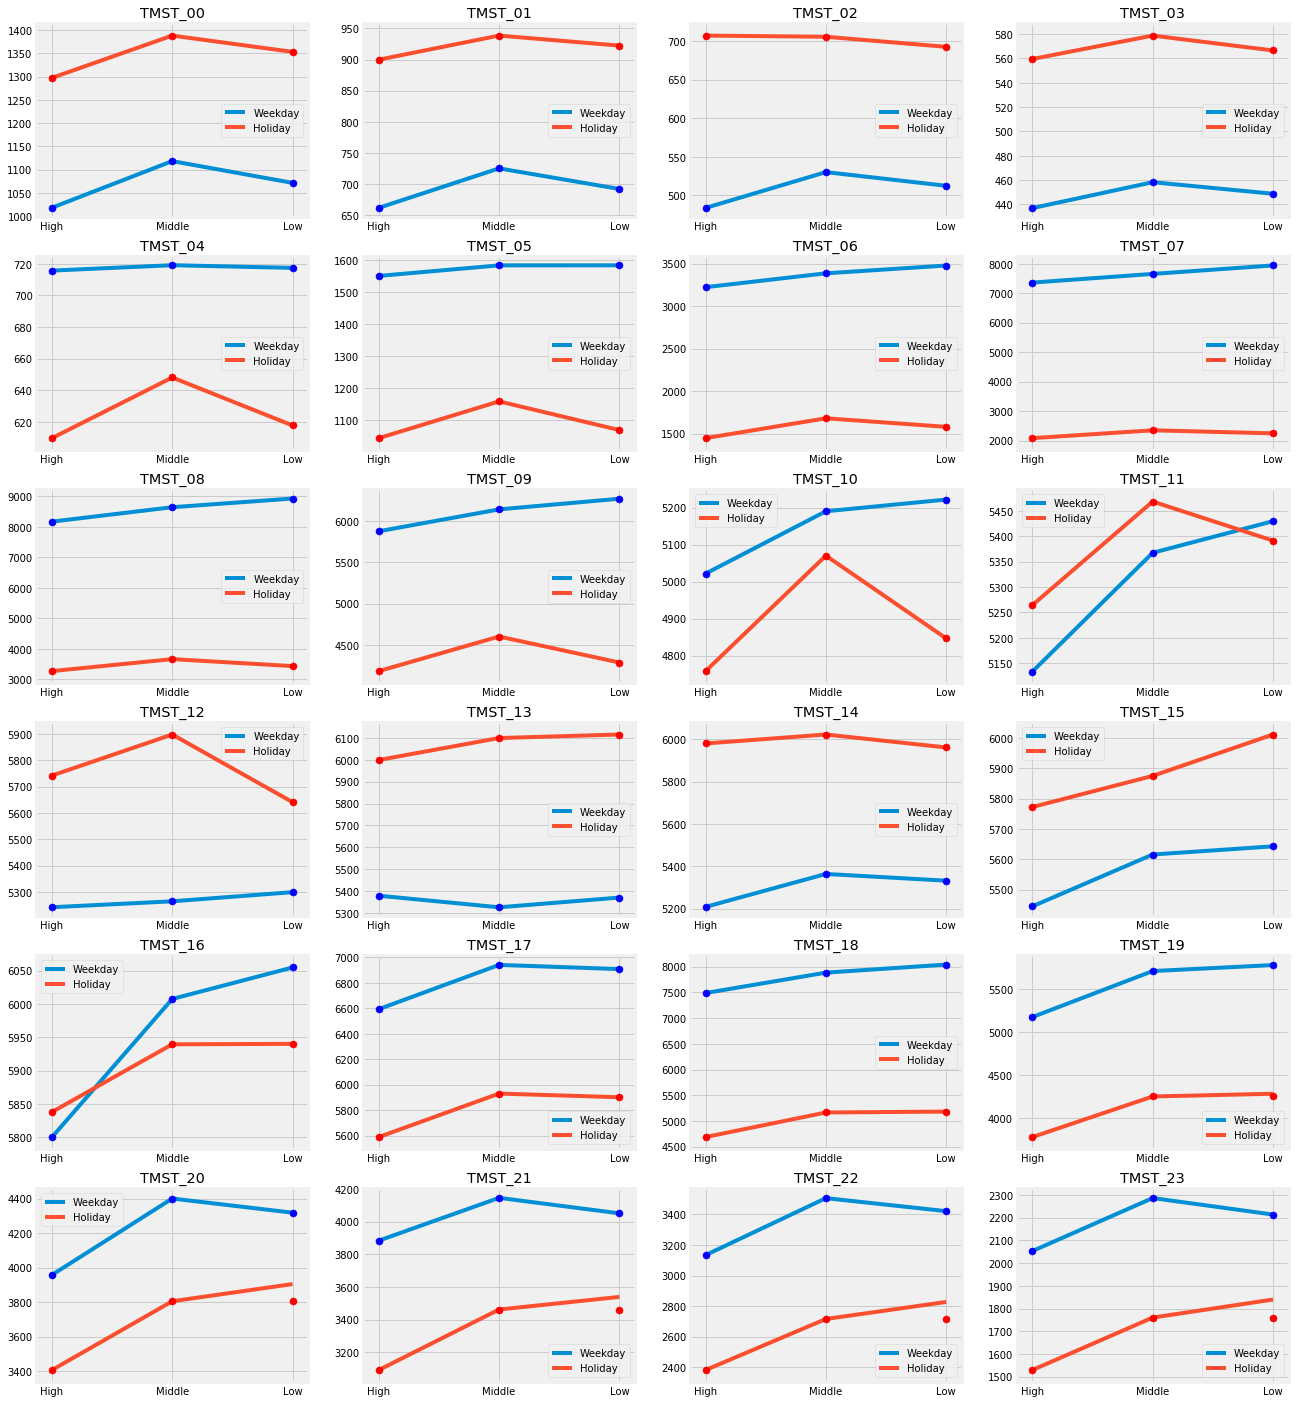

In [49]:
fignum=0
plt.figure(figsize=(20,25))
for i in list(time_sample_0.columns):
    plt.subplot(6,4,fignum+1)
    w = [time_sample_0_high_weekday.loc[i].mean(),time_sample_0_middle_weekday.loc[i].mean(),+time_sample_0_low_weekday.loc[i].mean()]
    h = [time_sample_0_high_holiday.loc[i].mean(),time_sample_0_middle_holiday.loc[i].mean(),time_sample_0_low_holiday.loc[i].mean()]
    plt.plot(pm,w)
    plt.scatter('High' ,time_sample_0_high_weekday.loc[i].mean(),color = 'b' ,s=50, zorder=10)
    plt.scatter('Middle' ,time_sample_0_middle_weekday.loc[i].mean(),color = 'b',s=50, zorder=10)
    plt.scatter('Low' ,time_sample_0_low_weekday.loc[i].mean(),color = 'b',s=50, zorder=10)
    plt.plot(pm,h)
    plt.scatter('High' ,time_sample_0_high_holiday.loc[i].mean(),color = 'r' ,s=50, zorder=10) 
    plt.scatter('Middle' ,time_sample_0_middle_holiday.loc[i].mean(),color = 'r',s=50, zorder=10)
    plt.scatter('Low' ,time_sample_0_low_holiday.loc[i].mean(),color = 'r',s=50, zorder=10)
    plt.title(str(i))
    plt.legend(['Weekday','Holiday'])
    fignum+=1
for i in list(time_sample_1.columns):
    plt.subplot(6,4,fignum+1)
    w = [time_sample_1_high_weekday.loc[i].mean(),time_sample_1_middle_weekday.loc[i].mean(),time_sample_1_low_weekday.loc[i].mean()]
    h = [time_sample_1_high_holiday.loc[i].mean(),time_sample_1_middle_holiday.loc[i].mean(),time_sample_1_low_holiday.loc[i].mean()]
    plt.plot(pm,w)
    plt.scatter('High' ,time_sample_1_high_weekday.loc[i].mean(),color = 'b' ,s=50, zorder=10)
    plt.scatter('Middle' ,time_sample_1_middle_weekday.loc[i].mean(),color = 'b',s=50, zorder=10)
    plt.scatter('Low' ,time_sample_1_low_weekday.loc[i].mean(),color = 'b',s=50, zorder=10)
    plt.plot(pm,h)
    plt.scatter('High' ,time_sample_1_high_holiday.loc[i].mean(),color = 'r' ,s=50, zorder=10)
    plt.scatter('Middle' ,time_sample_1_middle_holiday.loc[i].mean(),color = 'r',s=50, zorder=10)
    plt.scatter('Low' ,time_sample_1_low_holiday.loc[i].mean(),color = 'r',s=50, zorder=10)
    plt.title(str(i))
    plt.legend(['Weekday','Holiday'])
    fignum+=1  
for i in list(time_sample_2.columns):
    plt.subplot(6,4,fignum+1)
    w = [time_sample_2_high_weekday.loc[i].mean(),time_sample_2_middle_weekday.loc[i].mean(),time_sample_2_low_weekday.loc[i].mean()]
    h = [time_sample_2_high_holiday.loc[i].mean(),time_sample_2_middle_holiday.loc[i].mean(),time_sample_2_low_holiday.loc[i].mean()]
    plt.plot(pm,w)
    plt.scatter('High' ,time_sample_2_high_weekday.loc[i].mean(),color = 'b' ,s=50, zorder=10)
    plt.scatter('Middle' ,time_sample_2_middle_weekday.loc[i].mean(),color = 'b',s=50, zorder=10)
    plt.scatter('Low' ,time_sample_2_low_weekday.loc[i].mean(),color = 'b',s=50, zorder=10)
    plt.plot(pm,h)
    plt.scatter('High' ,time_sample_2_high_holiday.loc[i].mean(),color = 'r' ,s=50, zorder=10)
    plt.scatter('Middle' ,time_sample_2_middle_holiday.loc[i].mean(),color = 'r',s=50, zorder=10)
    plt.scatter('Low' ,time_sample_2_low_holiday.loc[i].mean(),color = 'r',s=50, zorder=10)
    plt.title(str(i))
    plt.legend(['Weekday','Holiday'])
    fignum+=1  
for i in list(time_sample_3.columns):
    plt.subplot(6,4,fignum+1)
    w = [time_sample_3_high_weekday.loc[i].mean(),time_sample_3_middle_weekday.loc[i].mean(),time_sample_3_low_weekday.loc[i].mean()]
    h = [time_sample_3_high_holiday.loc[i].mean(),time_sample_3_middle_holiday.loc[i].mean(),time_sample_3_low_holiday.loc[i].mean()]
    plt.plot(pm,w)
    plt.scatter('High' ,time_sample_3_high_weekday.loc[i].mean(),color = 'b' ,s=50, zorder=10)
    plt.scatter('Middle' ,time_sample_3_middle_weekday.loc[i].mean(),color = 'b',s=50, zorder=10)
    plt.scatter('Low' ,time_sample_3_low_weekday.loc[i].mean() ,color = 'b',s=50, zorder=10)
    plt.plot(pm,h)
    plt.scatter('High' ,time_sample_3_high_holiday.loc[i].mean(),color = 'r' ,s=50, zorder=10)
    plt.scatter('Middle' ,time_sample_3_middle_holiday.loc[i].mean(),color = 'r',s=50, zorder=10)
    plt.scatter('Low' ,time_sample_3_middle_holiday.loc[i].mean(),color = 'r',s=50, zorder=10)
    plt.title(str(i))
    plt.legend(['Weekday','Holiday'])
    fignum+=1   

시간대별 미세먼지 농도에따른 유동인구 시각화

In [31]:
age_data.head()

,STD_YMD,HDONG_CD,MAN_0009,MAN_1019,MAN_2029,MAN_3039,MAN_4049,MAN_5059,MAN_6069,MAN_70,WMAN_0009,WMAN_1019,WMAN_2029,WMAN_3039,WMAN_4049,WMAN_5059,WMAN_6069,WMAN_70
0,20180401,11110515,78.98,1045.92,2776.54,3996.64,4157.91,4141.25,3956.21,1165.64,142.94,1158.75,2476.23,2954.22,3263.74,3049.27,2810.70,811.56
1,20180401,11110530,263.79,3385.10,10964.61,13660.64,13327.45,13843.72,13787.50,4743.49,395.09,3946.88,12407.47,11561.01,11533.92,11891.40,10025.36,2972.08
2,20180401,11110540,78.07,586.33,1919.18,2820.54,2895.42,2667.85,2681.06,845.55,91.00,745.18,2363.92,2417.99,2344.41,2385.39,1979.48,421.64
3,20180401,11110550,228.50,1734.85,4347.77,7678.93,8770.41,7488.22,8167.98,2366.21,252.55,1995.96,3944.20,5459.47,6476.51,5229.28,5251.96,1498.65
4,20180401,11110560,354.38,3463.71,7520.31,12716.30,15683.12,14420.70,15828.98,5432.39,434.74,4115.72,6864.67,10259.92,12601.96,10675.46,10997.54,3820.41


In [32]:
age_data_man= age_data.groupby('STD_YMD')['MAN_0009','MAN_1019', 'MAN_2029', 'MAN_3039', 'MAN_4049', 'MAN_5059', 'MAN_6069', 'MAN_70'].mean()
age_data_woman= age_data.groupby('STD_YMD')['WMAN_0009','WMAN_1019', 'WMAN_2029', 'WMAN_3039', 'WMAN_4049', 'WMAN_5059', 'WMAN_6069', 'WMAN_70'].mean()

In [33]:
man_high_weekday=[]
man_middle_weekday=[]
man_low_weekday=[]

for i in time_sample_high_weekday:
    man_high_weekday.append(age_data_man.loc[i])
for i in time_sample_middle_weekday:
    man_middle_weekday.append(age_data_man.loc[i])
for i in time_sample_low_weekday:
    man_low_weekday.append(age_data_man.loc[i])
    
man_high_weekday=pd.concat(man_high_weekday)
man_middle_weekday=pd.concat(man_middle_weekday)
man_low_weekday=pd.concat(man_low_weekday)

man_high_holiday=[]
man_middle_holiday=[]
man_low_holiday=[]

for i in time_sample_high_holiday:
    man_high_holiday.append(age_data_man.loc[i])
for i in time_sample_middle_holiday:
    man_middle_holiday.append(age_data_man.loc[i])
for i in time_sample_low_holiday:
    man_low_holiday.append(age_data_man.loc[i])
    
man_high_holiday=pd.concat(man_high_holiday)
man_middle_holiday=pd.concat(man_middle_holiday)
man_low_holiday=pd.concat(man_low_holiday)

남성 미세먼지별 유동인구 

In [34]:
list(age_data_man.columns)

['MAN_0009',
 'MAN_1019',
 'MAN_2029',
 'MAN_3039',
 'MAN_4049',
 'MAN_5059',
 'MAN_6069',
 'MAN_70']

In [42]:
pm

['High', 'Middle & Low']

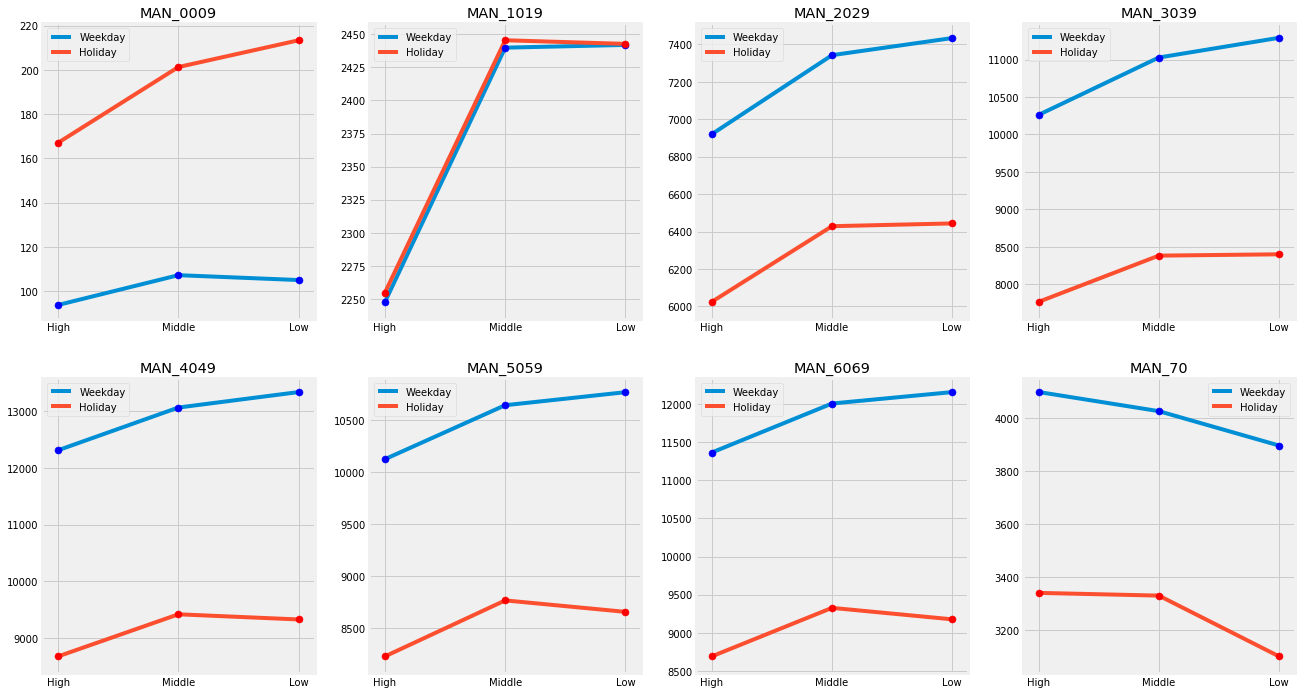

In [50]:
fignum=0
plt.figure(figsize=(20,25))
for i in list(age_data_man.columns):
    plt.subplot(4,4,fignum+1)
    w = [man_high_weekday.loc[i].mean(),man_middle_weekday.loc[i].mean(),man_low_weekday.loc[i].mean()]
    h = [man_high_holiday.loc[i].mean(),man_middle_holiday.loc[i].mean(),man_low_holiday.loc[i].mean()]
    plt.plot(pm,w)
    plt.scatter('High' ,man_high_weekday.loc[i].mean(),color = 'b' ,s=50, zorder=10)
    plt.scatter('Middle' ,man_middle_weekday.loc[i].mean(),color = 'b',s=50, zorder=10)
    plt.scatter('Low' ,man_low_weekday.loc[i].mean(),color = 'b',s=50, zorder=10)
    plt.plot(pm,h)
    plt.scatter('High' ,man_high_holiday.loc[i].mean(),color = 'r' ,s=50, zorder=10)
    plt.scatter('Middle' ,man_middle_holiday.loc[i].mean(),color = 'r',s=50, zorder=10)
    plt.scatter('Low' ,man_low_holiday.loc[i].mean(),color = 'r',s=50, zorder=10)
    plt.title(str(i))
    plt.legend(['Weekday','Holiday'])
    fignum+=1


남성 미세먼지별 유동인구 시각화

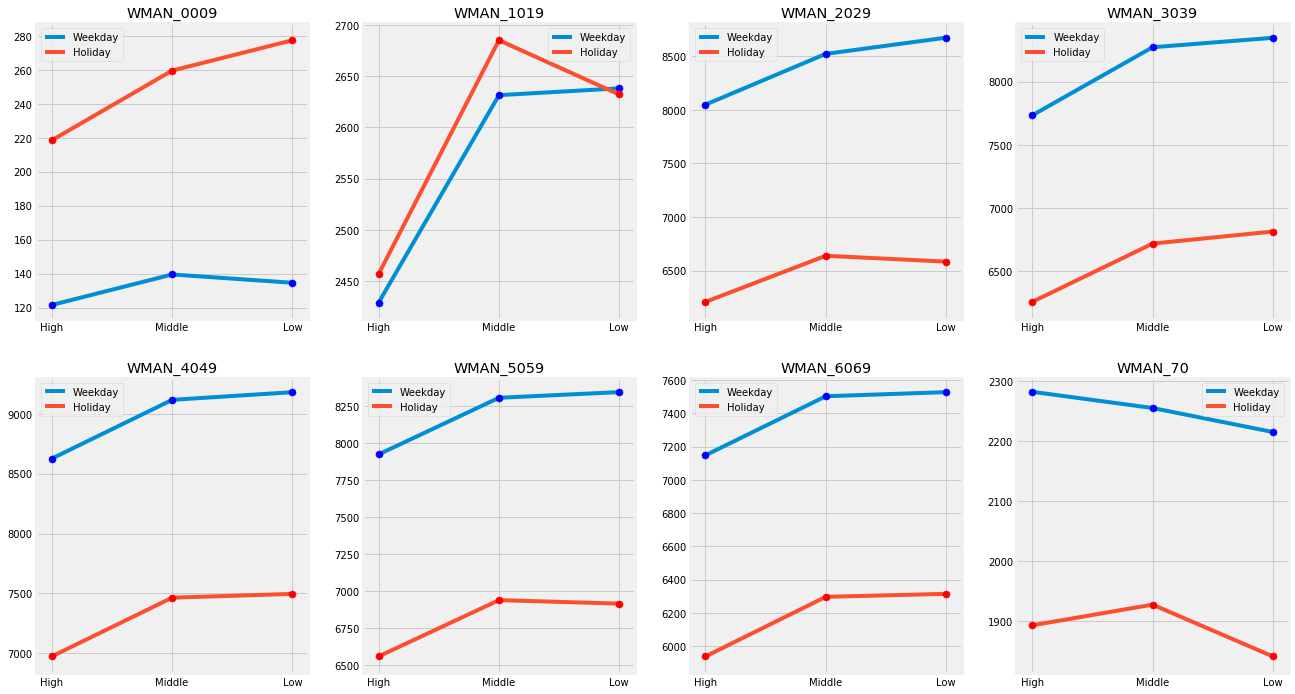

In [51]:
woman_high_weekday=[]
woman_middle_weekday=[]
woman_low_weekday=[]

for i in time_sample_high_weekday:
    woman_high_weekday.append(age_data_woman.loc[i])
for i in time_sample_middle_weekday:
    woman_middle_weekday.append(age_data_woman.loc[i])
for i in time_sample_low_weekday:
    woman_low_weekday.append(age_data_woman.loc[i])
    
woman_high_weekday=pd.concat(woman_high_weekday)
woman_middle_weekday=pd.concat(woman_middle_weekday)
woman_low_weekday=pd.concat(woman_low_weekday)

woman_high_holiday=[]
woman_middle_holiday=[]
woman_low_holiday=[]

for i in time_sample_high_holiday:
    woman_high_holiday.append(age_data_woman.loc[i])
for i in time_sample_middle_holiday:
    woman_middle_holiday.append(age_data_woman.loc[i])
for i in time_sample_low_holiday:
    woman_low_holiday.append(age_data_woman.loc[i])
    
woman_high_holiday=pd.concat(woman_high_holiday)
woman_middle_holiday=pd.concat(woman_middle_holiday)
woman_low_holiday=pd.concat(woman_low_holiday)

fignum=0
plt.figure(figsize=(20,25))
for i in list(age_data_woman.columns):
    plt.subplot(4,4,fignum+1)
    w = [woman_high_weekday.loc[i].mean(),woman_middle_weekday.loc[i].mean(),woman_low_weekday.loc[i].mean()]
    h = [woman_high_holiday.loc[i].mean(),woman_middle_holiday.loc[i].mean(),woman_low_holiday.loc[i].mean()]
    plt.plot(pm,w)
    plt.scatter('High' ,woman_high_weekday.loc[i].mean(),color = 'b' ,s=50, zorder=10)
    plt.scatter('Middle' ,woman_middle_weekday.loc[i].mean(),color = 'b',s=50, zorder=10)
    plt.scatter('Low' ,woman_low_weekday.loc[i].mean(),color = 'b',s=50, zorder=10)
    plt.plot(pm,h)
    plt.scatter('High' ,woman_high_holiday.loc[i].mean(),color = 'r' ,s=50, zorder=10)
    plt.scatter('Middle' ,woman_middle_holiday.loc[i].mean(),color = 'r',s=50, zorder=10)
    plt.scatter('Low' ,woman_low_holiday.loc[i].mean(),color = 'r',s=50, zorder=10)
    plt.title(str(i))
    plt.legend(['Weekday','Holiday'])
    fignum+=1


In [ ]:
여성 유동이

In [52]:
age = ['0_9','10_19', '20_29' ,'30_39', '40_49', '50_59', '60_69' ,'70_over']

In [53]:
w_h_w=[]
w_h_h=[]
w_m_w=[]
w_m_h=[]
w_l_w=[]
w_l_h=[]
m_h_w=[]
m_h_h=[]
m_m_w=[]
m_m_h=[]
m_l_w=[]
m_l_h=[]
for i in list(age_data_woman.columns):
    w_h_w.append(woman_high_weekday.loc[i].mean())
    w_m_w.append(woman_middle_weekday.loc[i].mean())
    w_l_w.append(woman_low_weekday.loc[i].mean())
    w_h_h.append(woman_high_holiday.loc[i].mean())
    w_m_h.append(woman_middle_holiday.loc[i].mean())
    w_l_h.append(woman_low_holiday.loc[i].mean())
for i in list(age_data_man.columns):
    m_h_w.append(man_high_weekday.loc[i].mean())
    m_m_w.append(man_middle_weekday.loc[i].mean())
    m_l_w.append(man_low_weekday.loc[i].mean())
    m_h_h.append(man_high_holiday.loc[i].mean())
    m_m_h.append(man_middle_holiday.loc[i].mean())
    m_l_h.append(man_low_holiday.loc[i].mean())


Text(0.5, 1.0, 'Holiday')

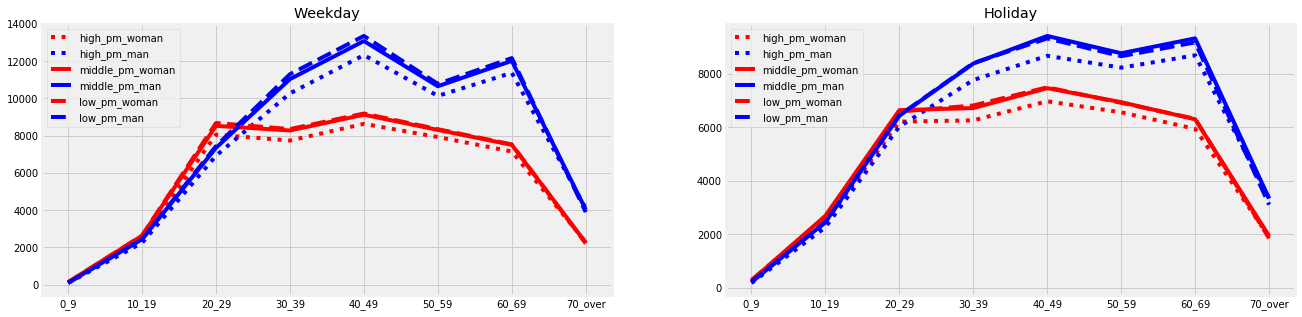

In [54]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(age,w_h_w, color='r',linestyle=':')
plt.legend('high_pm_woman')
plt.plot(age,m_h_w, color='b',linestyle=':')
plt.legend('high_pm_man')
plt.plot(age,w_m_w, color='r')
plt.legend('middle_pm_woman')
plt.plot(age,m_m_w, color='b')
plt.legend('middle_pm_man')
plt.plot(age,w_l_w, color='r',linestyle='--' )
plt.legend('low_pm_woman')
plt.plot(age,m_l_w, color='b',linestyle='--')
plt.legend(['high_pm_woman', 'high_pm_man', 'middle_pm_woman', 'middle_pm_man','low_pm_woman', 'low_pm_man'])
plt.title('Weekday')
plt.subplot(1,2,2)
plt.plot(age,w_h_h, color='r',linestyle=':')
plt.legend('high_pm_woman')
plt.plot(age,m_h_h, color='b',linestyle=':')
plt.legend('high_pm_man')
plt.plot(age,w_m_h, color='r')
plt.legend('middle_pm_woman')
plt.plot(age,m_m_h, color='b')
plt.legend('middle_pm_man')
plt.plot(age,w_l_h, color='r',linestyle='--' )
plt.legend('low_pm_woman')
plt.plot(age,m_l_h, color='b',linestyle='--')
plt.legend(['high_pm_woman', 'high_pm_man', 'middle_pm_woman', 'middle_pm_man','low_pm_woman', 'low_pm_man'])
plt.title('Holiday')